In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('E:\\Data Science\\Data Sets\\Data Science In Logistic Domain\\Food Demand Forecasting\\train.csv')

In [3]:
raw_data.shape

(456548, 9)

In [4]:
# set up display area to show dataframe in jupyter qtconsole

pd. set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [5]:
raw_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


## Checkpoint 1:

In [6]:
df = raw_data.drop(['id'],axis=1)

In [7]:
df.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
df.columns

Index(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

## Declaring Inputs and Targets:

In [9]:
x = df.drop(['num_orders'],axis=1)
y = df['num_orders']

## Scaling Inputs:

In [11]:
x_scalable = x.drop(['emailer_for_promotion','homepage_featured'],axis=1)
x_unscalable = x.drop(['week', 'center_id', 'meal_id', 'checkout_price', 'base_price'],axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_scalable)
x_scaled = scaler.transform(x_scalable)
x_scaled_df = pd.DataFrame(x_scaled,columns=['week', 'center_id', 'meal_id', 'checkout_price', 'base_price'])

In [19]:
x_scaled_all = pd.concat([x_scaled_df,x_unscalable],axis=1)

In [20]:
x_scaled_all.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,-1.776494,-0.589577,-0.254535,-1.277687,-1.256048,0,0
1,-1.776494,-0.589577,-0.057246,-1.277687,-1.358465,0,0
2,-1.776494,-0.589577,0.940160,-1.290568,-1.358278,0,0
3,-1.776494,-0.589577,0.209460,0.047477,0.518763,0,0
4,-1.776494,-0.589577,1.108221,-0.580222,-0.694746,0,0


## Train Test Split:

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled_all,y,test_size=0.20,random_state=42)

## Training the model: Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
reg.score(x_train,y_train)

0.97180936803744

## Testing the Model: Using Random Forest

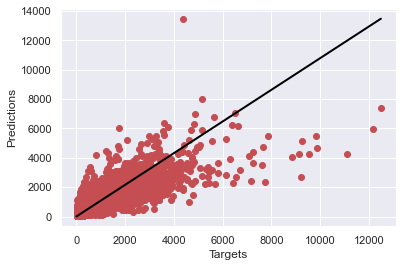

In [24]:
y_pred = reg.predict(x_test)

plt.scatter(y_test,y_pred,color='r')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color = 'black', linewidth = 2)
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

In [25]:
reg.score(x_test,y_test)

0.799397056774998

## Training: Xgboost:

In [26]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
classifier.score(x_train,y_train)

0.8382200598481471

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
classifier.score(x_test,y_test)

0.8048396426209565